In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Guadagno del PMT02

In [2]:
Stoppingpower=1 #MeV su g su cm
spessore=2.6 #cm
grammi=2 #g
DE=grammi*Stoppingpower *2.6 #MeV
print(f"Delta E rilasciata nello scintillatore plastico {DE} MeV")
conversione=1e4 #fotoni per Mev
fotoni=DE*conversione
print(f"Fotoni emessi dallo scintillatore plastico {fotoni}")

Delta E rilasciata nello scintillatore plastico 5.2 MeV
Fotoni emessi dallo scintillatore plastico 52000.0


In [ ]:
quantum_efficiency=0.20 #e- per fotone
elettroni=quantum_efficiency*fotoni
print(f"Elettroni emessi dal PMT02 {elettroni}")
DV=600e-3 #misurato all'oscilloscopio in V
t=20e-9 #durata del segnale in s
R=50 # resistenza all'oscilloscopio in Ohm
Q=DV*t/R #carica rilasciata
print(f"Carica rilasciata all'oscilloscopio {Q}")

Elettroni emessi dal PMT02 10400.0
Carica rilasciata all'oscilloscopio 2.4e-10


In [ ]:
Qe=1.6 * 1e-19
gain=Q/(Qe*elettroni)
print(f"Guadagno del sistema {gain/1e5:.2f} 1e5 a 1500V, comparabile con il valore del manuale.")

Guadagno del sistema 1.44 1e5 a 1500V, comparabile con il valore del manuale.


In [ ]:
DE=0.1# MeV
fotoni=DE*conversione
elettroni=quantum_efficiency*fotoni
Q=gain*Qe*elettroni
DV=Q*R/t
print(f"Voltaggio che mi aspetto in {DV*1e3:.2f} mV.")


Voltaggio che mi aspetto in 11.54 mV.


## Grandezza del fascio 

In [1]:
senzabersaglio=np.sqrt(771)/6 #6 secondi
conbersaglio=np.sqrt(991)/6
diffbersaglio=991/6-771/6
errdiffbersaglio=np.sqrt(senzabersaglio**2+conbersaglio**2)
diffbersaglio/errdiffbersaglio
print(f"Differenza in rate a 115° {diffbersaglio:.1f} +- {errdiffbersaglio:.1f} Hz. Significatività in sigma: {diffbersaglio/errdiffbersaglio:.1f} ")

NameError: name 'np' is not defined

Posizione dell'asse del fascio (massima frequenza): 95.00 gradi
Angolo a sinistra della FWHM: 85.88 gradi
Angolo a destra della FWHM: 100.75 gradi
Larghezza completa a metà altezza (FWHM): 14.87 gradi


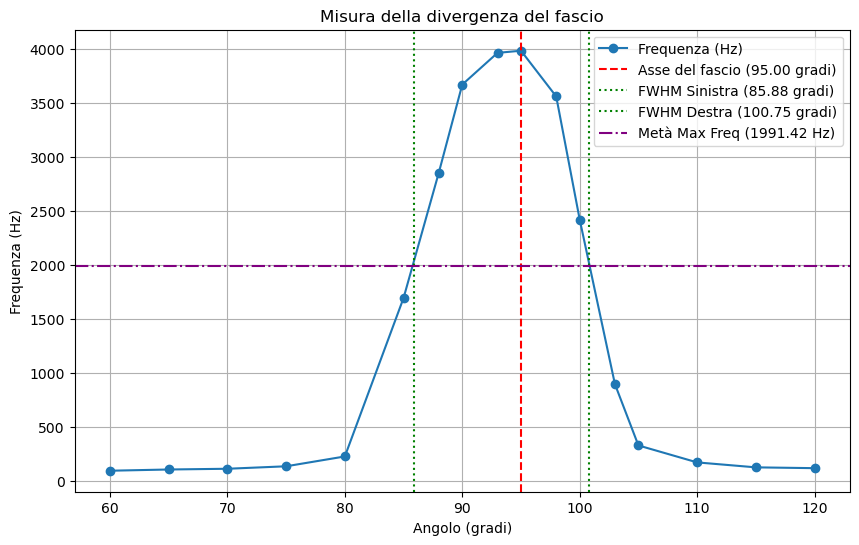

In [ ]:
angles = np.array([60, 65, 70,
                    75, 80, 85, 
                    88, 90, 93, 
                    95, 98, 100, 103, 105, 
                    110, 115, 120])  # Angoli (in gradi)
counts = np.array([584, 652, 693,
                    830, 1376, 10174, 
                    17125, 22019, 23778, 
                    23897, 21358, 14527, 5390, 1987, 
                    1046, 771, 726])  # Conteggi (media delle ripetizioni quando presenti)

frequencies=counts/6 #in 6 secondi, frequenza in Hz

# 1. Trova la frequenza massima e la sua posizione angolare
max_frequency = np.max(frequencies)
max_frequency_index = np.argmax(frequencies)
best_angle = angles[max_frequency_index]

# 2. Trova la metà della frequenza massima
half_max_frequency = max_frequency / 2

# 3. Stima gli angoli a metà altezza (FWHM) usando l'interpolazione linearedef find_fwhm_angles(angles, frequencies, half_max_frequency):
def find_fwhm_angles(angles, frequencies, half_max_frequency):
    # Trova gli indici dove la frequenza supera la metà del massimo
    indices_above = np.where(frequencies > half_max_frequency)[0]

    # Trova gli indici a sinistra e a destra del picco
    indices_left = indices_above[indices_above < max_frequency_index]
    indices_right = indices_above[indices_above > max_frequency_index]

    # Gestisci il caso in cui non ci sono punti a sinistra del picco
    if len(indices_left) == 0:
        print("Avviso: Nessun punto sopra la metà del massimo a sinistra del picco.")
        return None, None # Impossibile calcolare il lato sinistro della FWHM
    
    #Gestisci il caso in cui non ci sono punti a destra del picco
    if len(indices_right) == 0:
        print("Avviso: Nessun punto sopra la metà del massimo a destra del picco.")
        return None, None # Impossibile calcolare il lato destro della FWHM

    # Trova l'indice più vicino a metà altezza a sinistra del picco
    left_index = indices_left[0]
    # Trova l'indice più vicino a metà altezza a destra del picco
    right_index = indices_right[-1]

    # Interpolazione lineare per stimare gli angoli
    def interpolate_angle(x1, y1, x2, y2, y_target):
        return x1 + (y_target - y1) * (x2 - x1) / (y2 - y1)
    
    left_angle = interpolate_angle(angles[left_index], frequencies[left_index],
                                     angles[left_index+1], frequencies[left_index+1],
                                     half_max_frequency)
    right_angle = interpolate_angle(angles[right_index-1], frequencies[right_index-1],
                                     angles[right_index], frequencies[right_index],
                                     half_max_frequency)

    return left_angle, right_angle

left_angle, right_angle = find_fwhm_angles(angles, frequencies, half_max_frequency)

# 4. Calcola la larghezza completa a metà altezza (FWHM)
if left_angle is not None and right_angle is not None:
    fwhm = right_angle - left_angle
    print(f"Posizione dell'asse del fascio (massima frequenza): {best_angle:.2f} gradi")
    print(f"Angolo a sinistra della FWHM: {left_angle:.2f} gradi")
    print(f"Angolo a destra della FWHM: {right_angle:.2f} gradi")
    print(f"Larghezza completa a metà altezza (FWHM): {fwhm:.2f} gradi")
else:
    print("Impossibile determinare FWHM. La metà della frequenza massima non è stata raggiunta.")

# 5. Visualizzazione dei dati e della FWHM
plt.figure(figsize=(10, 6))
plt.plot(angles, frequencies, marker='o', linestyle='-', label='Frequenza (Hz)')
plt.axvline(x=best_angle, color='red', linestyle='--', label=f'Asse del fascio ({best_angle:.2f} gradi)')

if left_angle is not None and right_angle is not None:
    plt.axvline(x=left_angle, color='green', linestyle=':', label=f'FWHM Sinistra ({left_angle:.2f} gradi)')
    plt.axvline(x=right_angle, color='green', linestyle=':', label=f'FWHM Destra ({right_angle:.2f} gradi)')
    plt.axhline(y=half_max_frequency, color='purple', linestyle='-.', label=f'Metà Max Freq ({half_max_frequency:.2f} Hz)')

plt.xlabel('Angolo (gradi)')
plt.ylabel('Frequenza (Hz)')
plt.title('Misura della divergenza del fascio')
plt.grid(True)
plt.legend()
plt.show()


## Coincidenze accidentali e segnale

In [8]:
counts_coincidenze=np.array([32, 27, 34, 21, 27]) #conteggi
counts_PMT1=np.array([812, 828, 898, 767, 796])
counts_PMT2=np.array([3927, 13788, 14046, 13799, 13816])

coincidenze=counts_coincidenze/6 #rate in Hz
PMT1=counts_PMT1/6
PMT2=counts_PMT2/6

coinc=np.mean(coincidenze) #valori di media e deviazione standard
sigma_coinc=np.std(coincidenze)

PMT1_mean=np.mean(PMT1) 
sigma_PMT1=np.std(PMT1)
PMT2_mean=np.mean(PMT2)
sigma_PMT2=np.std(PMT2)

In [11]:
#valutare coincidenze accidentali
rate_acc=PMT1_mean*PMT2_mean*(136e-9+90e-9-2*2e-9)
sigma_rate_acc=np.sqrt((sigma_PMT1*PMT2_mean*(136e-9+90e-9-2*2e-9))**2+(PMT1_mean*sigma_PMT2*(136e-9+90e-9-2*2e-9))**2)

In [16]:
print(f"Rate coincidenze {coinc:.1f} +- {sigma_coinc:.1f} Hz")
print(f"Rate accidentale {rate_acc:.2f} +- {sigma_rate_acc:.2f} Hz ")
diff=coinc-rate_acc
err_diff=np.sqrt(sigma_rate_acc**2+sigma_coinc**2)
print(f"Differenza in rate a 70° {diff:.1f} +- {err_diff:.1f}. Significatività in sigma {diff/err_diff:.1f} ")

Rate coincidenze 4.7 +- 0.8 Hz
Rate accidentale 0.06 +- 0.02 Hz 
Differenza in rate a 70° 4.6 +- 0.8. Significatività in sigma 6.1 


## Minimo angolo di deflessione per elettrone libero

In [7]:
K=0.277e3 #energia di legame orbitale K
me=0.5e6

In [ ]:
E=1.17e6

In [ ]:
cos=1-(K/(E-K))*me/E
theta=np.arccos(cos) #radianti
theta_deg=np.rad2deg(theta)

In [ ]:
print(f'Per energia fotone {E/1e6} MeV ho {theta_deg:.2f} °')

Per energia fotone 1.17 MeV ho 0.82 °


In [ ]:
E=1.33e6

In [ ]:
cos=1-(K/(E-K))*me/E
theta_deg=np.rad2deg(np.arccos(cos))

In [ ]:
print(f'Per energia fotone {E/1e6} MeV ho {theta_deg:.2f} °')

Per energia fotone 1.33 MeV ho 0.72 °


In [56]:
np.sqrt(22019)/60

2.4731334151009503

In [57]:
np.sqrt(20037)/60

2.3592018424317436

In [60]:
(366-334)/np.sqrt(8)

11.31370849898476